In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from ucimlrepo import fetch_ucirepo
import seaborn as sns

In [46]:
cdc_diabetes_indicators=fetch_ucirepo(id=81)
a=cdc_diabetes_indicators.data.features
b=cdc_diabetes_indicators.data.targets

print(cdc_diabetes_indicators.metadata)
print(cdc_diabetes_indicators.variables)

{'uci_id': 81, 'name': 'Pen-Based Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/81/data.csv', 'abstract': 'Digit database of 250 samples from 44 writers', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 10992, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Wed Jul 01 1998', 'dataset_doi': '10.24432/C5MG6K', 'creators': ['E. Alpaydin', 'Fevzi. Alimoglu'], 'intro_paper': None, 'additional_info': {'summary': 'We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by t

In [47]:
a.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0


In [48]:
b.head()

,Class
0,8
1,2
2,1
3,4
4,1


In [49]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   10992 non-null  int64
 1   Attribute2   10992 non-null  int64
 2   Attribute3   10992 non-null  int64
 3   Attribute4   10992 non-null  int64
 4   Attribute5   10992 non-null  int64
 5   Attribute6   10992 non-null  int64
 6   Attribute7   10992 non-null  int64
 7   Attribute8   10992 non-null  int64
 8   Attribute9   10992 non-null  int64
 9   Attribute10  10992 non-null  int64
 10  Attribute11  10992 non-null  int64
 11  Attribute12  10992 non-null  int64
 12  Attribute13  10992 non-null  int64
 13  Attribute14  10992 non-null  int64
 14  Attribute15  10992 non-null  int64
 15  Attribute16  10992 non-null  int64
dtypes: int64(16)
memory usage: 1.3 MB


In [50]:
df=a
df['Class']=b
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


## Preprocesamiento y analisis exploratorio

In [51]:
df.describe()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Class
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,38.814320,85.120269,40.605622,83.774199,49.770378,65.573144,51.220251,44.498999,56.868541,33.695961,60.516376,34.826510,55.022289,34.937045,47.287482,28.845342,4.431587
std,34.257783,16.218571,26.342984,19.163646,34.100515,26.996688,30.576881,29.906104,34.135530,27.251548,37.288086,27.119982,22.335539,33.155463,41.760400,35.778094,2.876947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,76.000000,20.000000,72.000000,18.000000,49.000000,28.000000,23.000000,29.000000,7.000000,23.000000,11.000000,42.000000,5.000000,0.000000,0.000000,2.000000
50%,32.000000,89.000000,40.000000,91.000000,53.000000,71.000000,53.500000,43.000000,60.000000,33.000000,73.000000,30.000000,53.000000,27.000000,40.000000,9.000000,4.000000
75%,65.000000,100.000000,58.000000,100.000000,78.000000,86.000000,74.000000,64.000000,89.000000,54.000000,97.000000,55.000000,68.000000,47.000000,100.000000,51.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


La class evidentemente es una variable categorial realmente, por lo que intentaremos a partir de los atributos predecir a que clase pertenece

In [52]:
df["Class"].value_counts()

Class
2    1144
4    1144
0    1143
1    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: count, dtype: int64

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Class          0
dtype: int64


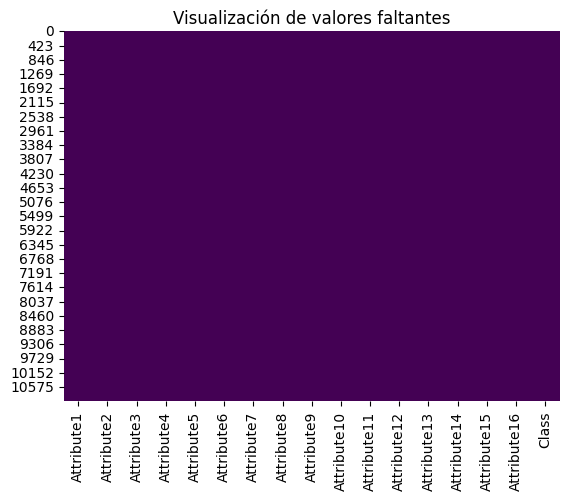

In [53]:
# Verificar valores faltantes
print(df.isnull().sum())

# Visualizar valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de valores faltantes')
plt.show()

In [54]:
df.duplicated().sum()


np.int64(0)

## Visualizaciones

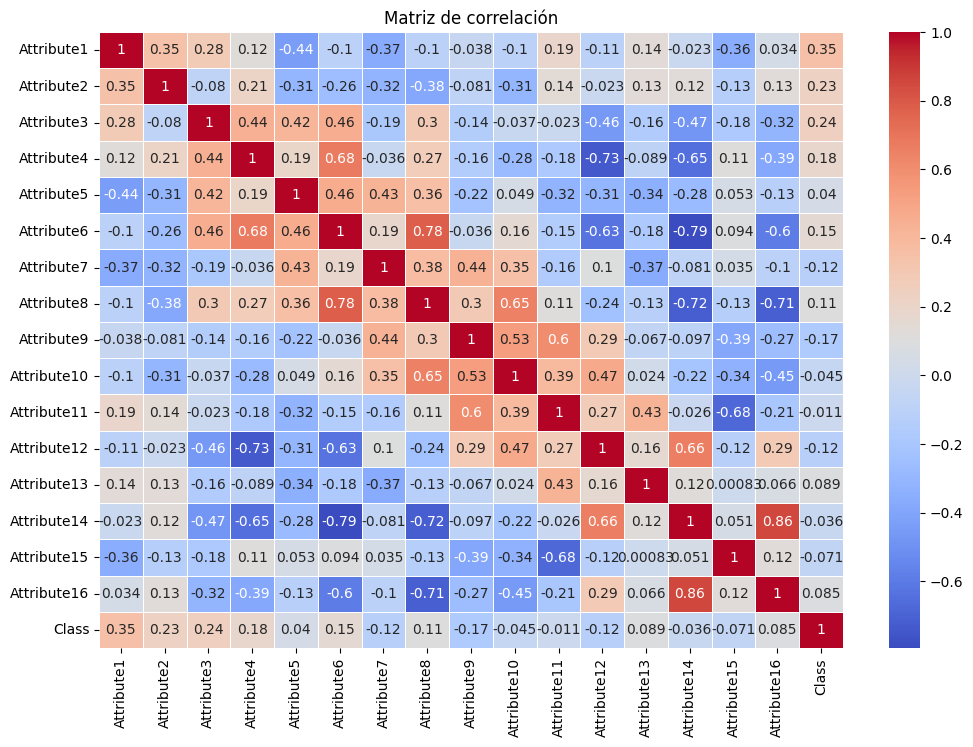

In [55]:
correlationMatrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlationMatrix,annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

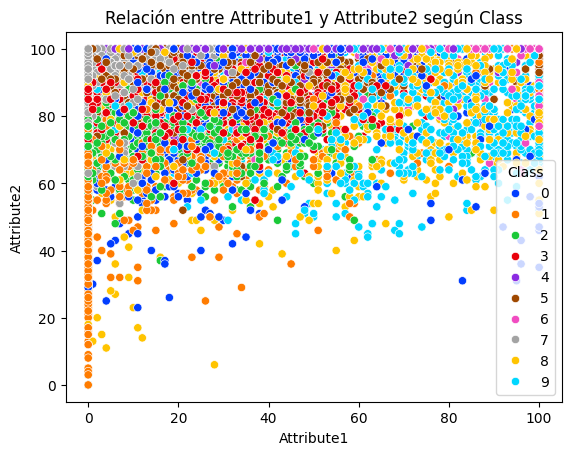

In [56]:
sns.scatterplot(x='Attribute1', y='Attribute2', hue='Class', data=df, palette='bright')
plt.title('Relación entre Attribute1 y Attribute2 según Class')
plt.show()

## Ingenieria de atributos

In [57]:
correlationTarget=abs(correlationMatrix["Class"])
relevantFeatures=correlationTarget[correlationTarget>0.5]
print("Atributos relevantes basados en la correlación con la variable objetivo:")
print(relevantFeatures)

Atributos relevantes basados en la correlación con la variable objetivo:
Class    1.0
Name: Class, dtype: float64


In [58]:
# Ganancia de información
from sklearn.feature_selection import mutual_info_classif

# calculo de ganancia de info de cada atributo
X=df.drop(columns=['Class'])
y=df['Class']
infoGain=mutual_info_classif(X,y)

# Dataframe 
infoGainDF=pd.DataFrame({"Feature":X.columns, "InfoGain":infoGain})
infoGainDF=infoGainDF.sort_values(by="InfoGain",ascending=False)
print('Atributos ordenados por Ganancia de Informacion')
print(infoGainDF)

Atributos ordenados por Ganancia de Informacion
        Feature  InfoGain
13  Attribute14  0.833258
15  Attribute16  0.820375
7    Attribute8  0.702196
5    Attribute6  0.594485
9   Attribute10  0.556922
4    Attribute5  0.521376
11  Attribute12  0.516246
14  Attribute15  0.503065
1    Attribute2  0.467868
3    Attribute4  0.453918
0    Attribute1  0.444666
10  Attribute11  0.435116
8    Attribute9  0.408014
6    Attribute7  0.328850
12  Attribute13  0.258297
2    Attribute3  0.234920


In [59]:
# Basado en consistencia
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar los 6 mejores atributos basados en su consistencia con la clase
selector=SelectKBest(score_func=f_classif,k=5)
selector.fit(X,y)
consistentFeatures=X.columns[selector.get_support()]
print("Atributos por consistencia")
print(consistentFeatures)

Atributos por consistencia
Index(['Attribute5', 'Attribute6', 'Attribute8', 'Attribute14', 'Attribute16'], dtype='object')


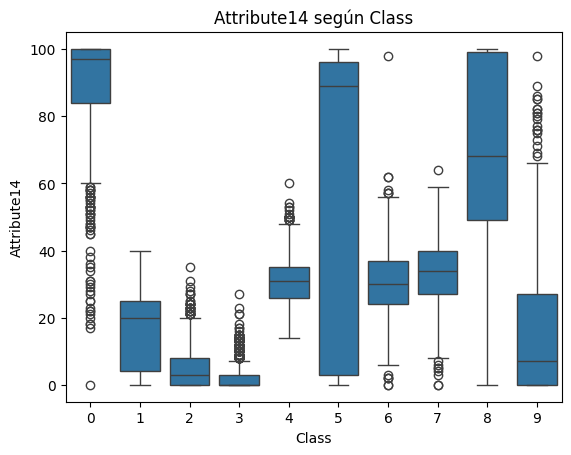

In [60]:
sns.boxplot(x='Class', y='Attribute14', data=df)
plt.title('Attribute14 según Class')
plt.ylabel('Attribute14')
plt.show()

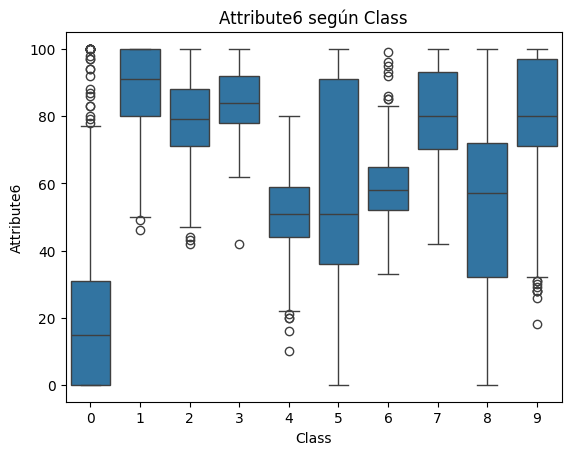

In [61]:
sns.boxplot(x='Class', y='Attribute6', data=df)
plt.title('Attribute6 según Class')
plt.ylabel('Attribute6')
plt.show()

## Machine Learning

In [62]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(a)

X_train ,X_test, y_train, y_test=train_test_split(X_scaled,b,test_size=0.3, random_state=42)

In [ ]:
models={
    "Regresion lineal": LinearRegression(),
    "SVR":SVR(),
    "Arbol de decisiones":DecisionTreeRegressor(),
    "Bosque aleatorio":RandomForestRegressor(),
}

print("Resultados")
for 